In [1]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-muted')
params = {'axes.labelsize': 20,
          'axes.titlesize': 20}
plt.rcParams.update(params)
import numpy as np
import pandas as pd

In [7]:
TRUE_VALUE = np.e - 2

def yPrime(t, y):
    return t + y

def eulersMethodAll(yPrime, N, a, b, alpha):
    h = (b-a) / N
    w = alpha
    times = [a]
    results = [w]
    for i in range(N+1):
        time = a + i * h
        times.append(time)
        w = w + h * yPrime(time, w)
        results.append(w)
    return (times, results)

In [19]:
results = []
for N in [2, 4, 8, 16]:
    results.append(eulersMethodAll(yPrime, N, a=0, b=1, alpha=0))

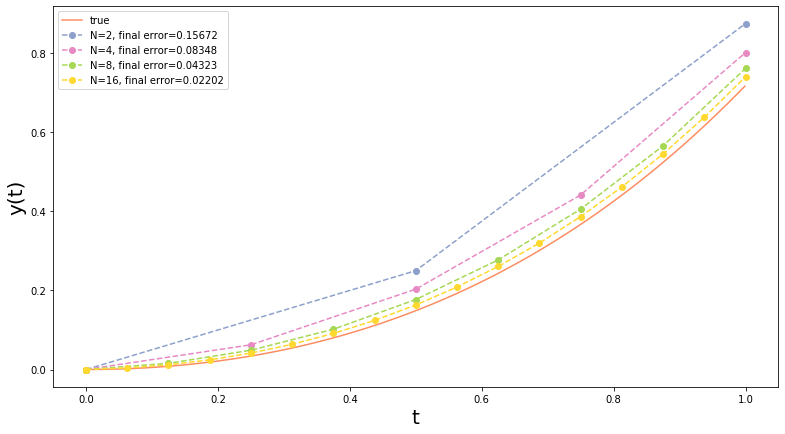

In [22]:
f, ax = plt.subplots(figsize=(13,7))
colors =  plt.get_cmap('Set2')

true_y = [np.exp(i) - i - 1 for i in np.arange(0,1,0.001)]

ax.plot(np.arange(0,1,0.001), true_y, color=colors(1), label='true')

for i in range(len(results)):
    final_error = results[i][1][-1] - TRUE_VALUE
    ax.plot(results[i][0], results[i][1], 'o--', color=colors(i+2), 
            label='N={}, final error={:0.5f}'.format(np.power(2,i+1), final_error))

ax.set_xlabel('t')
ax.set_ylabel('y(t)')
plt.legend()
# plt.savefig('f1.png', bbox_inches='tight')
plt.show()